# Peer-graded assignment: my1stNN

## Pre-processing

### Load dataset, check size, and preview

Using TensorFlow backend.


(50000, 28, 28) (50000,)


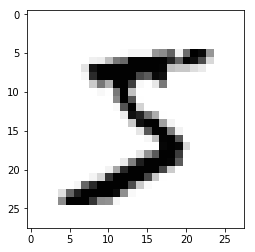

In [1]:
from preprocessed_mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
print(X_train.shape, y_train.shape)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap="Greys");

### Import dependecies

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

### Flatten images to 1D
And check that the images stay the same.

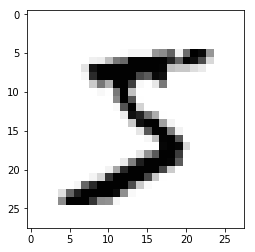

In [3]:
X_train = X_train.reshape((50000, 28 * 28))
X_test = X_test.reshape((10000, 28 * 28))

plt.imshow(X_train[0].reshape((28, 28)), cmap="Greys")

### One hot encode

In [4]:
y_train_1hot = np.eye(10)[y_train]
y_test_1hot = np.eye(10)[y_test]

### Set random seeds for reproducibility

In [5]:
tf.set_random_seed(42)
np.random.seed(60)

## Logistic regression model

In [6]:
X = tf.placeholder(tf.float32, [None, 28 * 28])
y = tf.placeholder(tf.float32, [None, 10])

weights = tf.Variable(tf.zeros([28 * 28, 10]))
biases = tf.Variable(tf.zeros([10]))

yhat = tf.nn.softmax(tf.matmul(X, weights) + biases)

cost = tf.reduce_mean(-tf.reduce_sum(y * tf.log(yhat), reduction_indices=1))

optimizer = tf.train.MomentumOptimizer(0.01, 0.5).minimize(cost, var_list=(weights, biases))

init = tf.global_variables_initializer()

### Accuracy calculator

In [7]:
def accuracy(yhat, y):
    s = 0
    n = y.shape[0]
    
    for i in range(n):
        if np.argmax(yhat[i]) == y[i]:
            s += 1
    
    return s / n

### Train logistic regression model

In [8]:
n_iter = 1500
batch_size = 500

train_costs = np.zeros([n_iter / 50])
test_costs = np.zeros([n_iter / 50])

with tf.Session() as sess:
    sess.run(init)
    
    for i in range(n_iter):
        ind = np.random.choice(X_train.shape[0], batch_size)
        
        sess.run([optimizer, cost],
                feed_dict = {
                    X: X_train[ind,:],
                    y: y_train_1hot[ind]
                })
        
        if ((i + 1) % 50 == 0):
            train_cost = sess.run(cost,
                    feed_dict = {
                        X: X_train,
                        y: y_train_1hot
                    })

            train_costs[(i - 49) / 50] = train_cost

            test_cost = sess.run(cost,
                    feed_dict = {
                        X: X_test,
                        y: y_test_1hot
                    })

            test_costs[(i - 49) / 50] = test_cost
        
        if (i + 1) % 250 == 0:
            
            yhat_train = sess.run(yhat,
                           feed_dict = {X: X_train})
            
            yhat_test = sess.run(yhat,
                           feed_dict = {X: X_test})
            
            acc_train = accuracy(yhat_train, y_train)
            acc_test = accuracy(yhat_test, y_test)
            
            print("Iteration", i + 1,
                  "Train cost", train_cost,
                  "Test cost", test_cost,
                  "Train accuracy", acc_train,
                  "Test accuracy", acc_test)
        
    print("")
    print("Final test accuracy", acc_test)

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:26: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:34: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Iteration 250 Train cost 0.807923 Test cost 0.775189 Train accuracy 0.83916 Test accuracy 0.8516
Iteration 500 Train cost 0.617448 Test cost 0.584761 Train accuracy 0.85912 Test accuracy 0.8729
Iteration 750 Train cost 0.539996 Test cost 0.508403 Train accuracy 0.86858 Test accuracy 0.8809
Iteration 1000 Train cost 0.496176 Test cost 0.46584 Train accuracy 0.87592 Test accuracy 0.8873
Iteration 1250 Train cost 0.467258 Test cost 0.437869 Train accuracy 0.88078 Test accuracy 0.8907
Iteration 1500 Train cost 0.446392 Test cost 0.417945 Train accuracy 0.88388 Test accuracy 0.8937

Final test accuracy 0.8937


### Plot costs

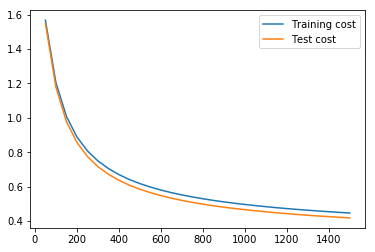

In [9]:
plt.plot(range(50, n_iter + 50, 50), train_costs, label = "Training cost")
plt.plot(range(50, n_iter + 50, 50), test_costs, label = "Test cost")
plt.legend()
plt.show()

## Neural network model

In [10]:
X = tf.placeholder(tf.float32, [None, 28 * 28])
y = tf.placeholder(tf.float32, [None, 10])

# Use Xavier initialization
initializer = tf.contrib.layers.xavier_initializer()

# Three fully connected layers
weights1 = tf.Variable(initializer([28 * 28, 256]))
biases1 = tf.Variable(initializer([256]))

activations1 = tf.nn.relu(tf.matmul(X, weights1) + biases1)

weights2 = tf.Variable(initializer([256, 256]))
biases2 = tf.Variable(initializer([256]))

activations2 = tf.nn.relu(tf.matmul(activations1, weights2) + biases2)

weights3 = tf.Variable(initializer([256, 10]))
biases3 = tf.Variable(initializer([10]))

yhat = tf.nn.softmax(tf.matmul(activations2, weights3) + biases3)

# Add L2 regularization
reg = tf.reduce_sum(weights1 ** 2) + tf.reduce_sum(weights2 ** 2) + tf.reduce_sum(weights3 ** 2)
reg2 = tf.reduce_sum(biases1 ** 2) + tf.reduce_sum(biases3 ** 2) + tf.reduce_sum(biases3 ** 2)

cost = tf.reduce_mean(-tf.reduce_sum(y * tf.log(yhat), reduction_indices=1)) + 0.001 * (reg + reg2)

optimizer = tf.train.AdamOptimizer(0.0006).minimize(cost, var_list=(weights1, biases1,
                                                                           weights2, biases2,
                                                                           weights3, biases3))

init = tf.global_variables_initializer()

### Train neural network model

In [11]:
n_iter = 1500
batch_size = 500

train_costs = np.zeros([n_iter / 50])
test_costs = np.zeros([n_iter / 50])

with tf.Session() as sess:
    sess.run(init)
    
    for i in range(n_iter):
        ind = np.random.choice(X_train.shape[0], batch_size)
        
        sess.run([optimizer, cost],
                feed_dict = {
                    X: X_train[ind,:],
                    y: y_train_1hot[ind]
                })
    
        if ((i + 1) % 50 == 0):
            train_cost = sess.run(cost,
                    feed_dict = {
                        X: X_train,
                        y: y_train_1hot
                    })

            train_costs[(i - 49) / 50] = train_cost

            test_cost = sess.run(cost,
                    feed_dict = {
                        X: X_test,
                        y: y_test_1hot
                    })

            test_costs[(i - 49) / 50] = test_cost
        
        if (i + 1) % 250 == 0:
            
            yhat_train = sess.run(yhat,
                           feed_dict = {X: X_train})
            
            yhat_test = sess.run(yhat,
                           feed_dict = {X: X_test})
            
            acc_train = accuracy(yhat_train, y_train)
            acc_test = accuracy(yhat_test, y_test)
            
            print("Iteration", i + 1,
                  "Train cost", train_cost,
                  "Test cost", test_cost,
                  "Train accuracy", acc_train,
                  "Test accuracy", acc_test)
        
    print("")
    print("Test accuracy", acc_test)

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:26: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:34: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Iteration 250 Train cost 0.491984 Test cost 0.494245 Train accuracy 0.95318 Test accuracy 0.9501
Iteration 500 Train cost 0.348387 Test cost 0.357101 Train accuracy 0.96986 Test accuracy 0.9646
Iteration 750 Train cost 0.281813 Test cost 0.292423 Train accuracy 0.97662 Test accuracy 0.9708
Iteration 1000 Train cost 0.24246 Test cost 0.25579 Train accuracy 0.9797 Test accuracy 0.974
Iteration 1250 Train cost 0.222494 Test cost 0.241425 Train accuracy 0.98134 Test accuracy 0.9744
Iteration 1500 Train cost 0.208421 Test cost 0.226665 Train accuracy 0.98274 Test accuracy 0.9743

Test accuracy 0.9743


### Plot costs

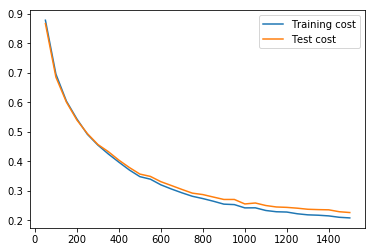

In [12]:
plt.plot(range(50, n_iter + 50, 50), train_costs, label = "Training cost")
plt.plot(range(50, n_iter + 50, 50), test_costs, label = "Test cost")
plt.legend()
plt.show()